# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
import numpy
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return (- numpy.sin(x))


In [7]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [11]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [10]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx

In [12]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


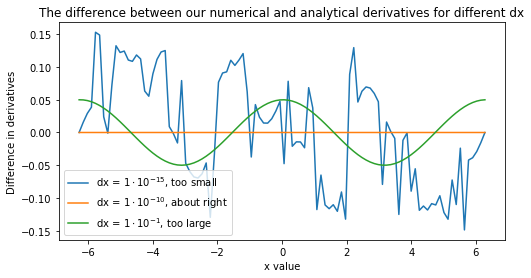

In [22]:
import matplotlib.pyplot as plt
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx = 1e-15)
df_dx_2 = backward_difference(f, xs, dx = 1e-10)
df_dx_3 = backward_difference(f, xs, dx = 1e-1)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label = "dx = $ 1 \cdot 10^{-15} $, too small")
plt.plot(xs, df_dx_2 - df_dx_analytical, label = "dx = $ 1 \cdot 10^{-10} $, about right" )
plt.plot(xs, df_dx_3 - df_dx_analytical, label = "dx = $ 1 \cdot 10^{-1} $, too large")
plt.title("The difference between our numerical and analytical derivatives for different dx")
plt.xlabel("x value")
plt.ylabel("Difference in derivatives")
plt.legend(loc = "lower left")


**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


If dx is too small then the value of $f(x-\Delta x)$ is very close to $f(x)$. mathematically you would expect this would be a good thing, but python can't store an infinite number of digits so it rounds to a certain number of significant figures which means eventually as dx gets closer to 0 $f(x)$ and $f(x-\Delta x)$ will differ less and less until eventually after rounding they are only different in (for example) the last few significant figures. At this point when calculating $\frac{f(x)-f(x-\Delta x)}{\Delta x}$ the rounding of $f(x-\Delta x)$ becomes very important as it means the value of $f(x) -f(x-\Delta x)$ will be known to only a few significant figures which decreases our accuracy when approximating the derivative compared to slightly larger values where we will know the value of $f(x) - f(x-\Delta x)$ to more significant figures.

Accuracy decreases when dx is too large, our method of approximating the derivative assumes that the function can be well approximated by a straight line on a small interval thus we can approximate its derivative at a point by calculating the gradient of a straight line passing through that point and another close point ( taking $\frac{\Delta y}{\Delta x} $ as the gradient). Usually on larger intervals the function will not be well approximated by a straight line so a too large dx will likely make our estimate pretty bad.
Equivelantly you could look it as we are estimating the function with its first order taylor polynomial at the point we want the derivative, taylor polynomials typically decrease in accuracy as you get further from the point at which they were generated so large dx will likely mean a bad accuracy.